In [22]:
#from google.colab import userdata
import os
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import pandas as pd

In [24]:
from utils.NLP_processing import *

In [25]:
df_ru = pd.read_feather('DataFrames/Oblast_ru.feather')
df_en = pd.read_feather('DataFrames/Oblast.feather')

In [26]:
df_ru.head(5)

,revision_id,timestamp,username,userid,comment,text_length,text,year,month
0,87130,2004-12-06 19:17:50+00:00,Maximaximax,450,кат,6895,[[Изображение:Oblast.jpg|thumb|'''Луганская об...,2004,12
1,73897,2004-11-29 00:46:10+00:00,HedgeBot,922,+ё,6861,[[Изображение:Oblast.jpg|thumb|'''Луганская об...,2004,11
2,69326,2004-11-17 13:20:45+00:00,Grigory Grin,1264,/* Луганская область */,6861,[[Изображение:Oblast.jpg|thumb|'''Луганская об...,2004,11
3,62615,2004-11-17 13:19:59+00:00,Grigory Grin,1264,/* Ссылки */,6882,[[Изображение:Oblast.jpg|thumb|'''Луганская об...,2004,11
4,62613,2004-11-09 12:33:42+00:00,Steschke,1115,interwiki,6824,[[Изображение:Oblast.jpg|thumb|'''Луганская об...,2004,11


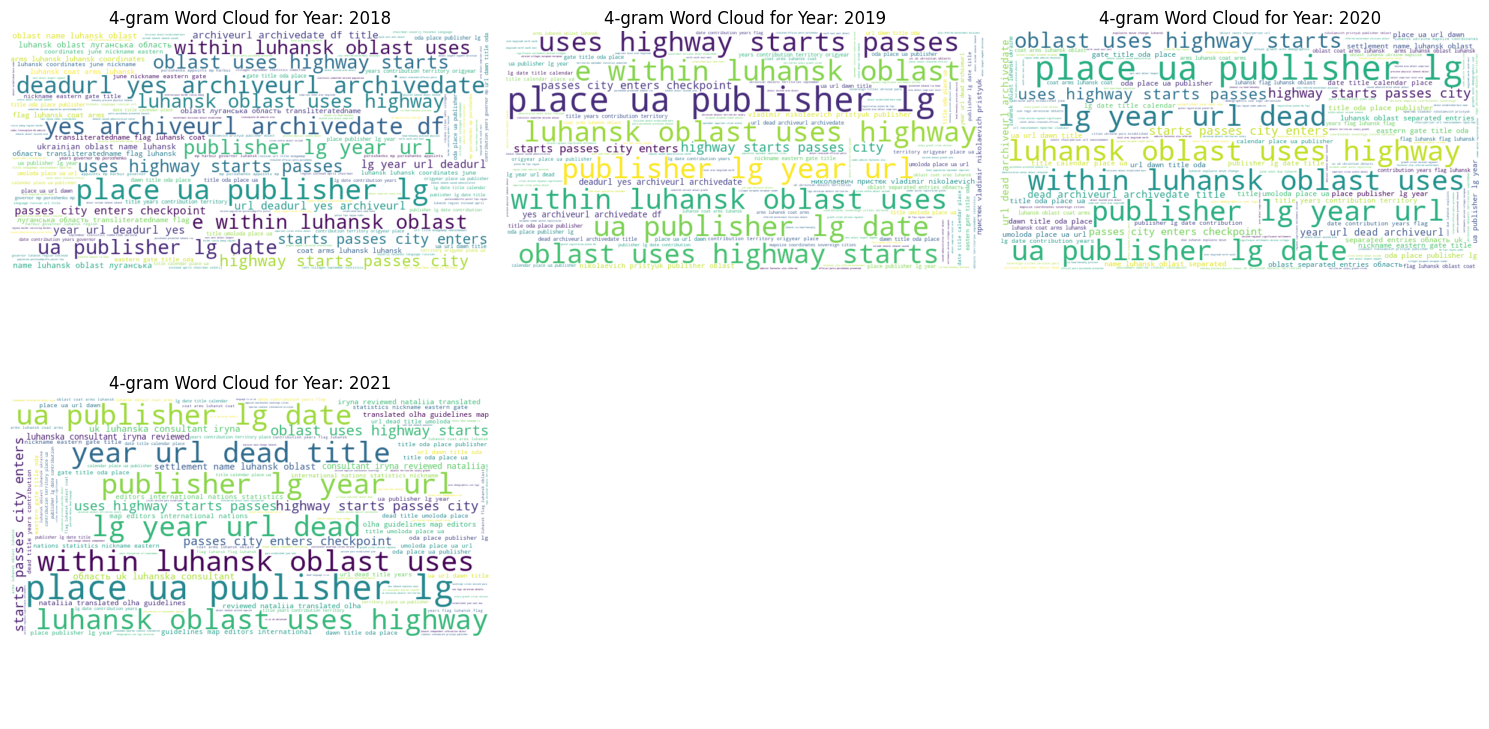

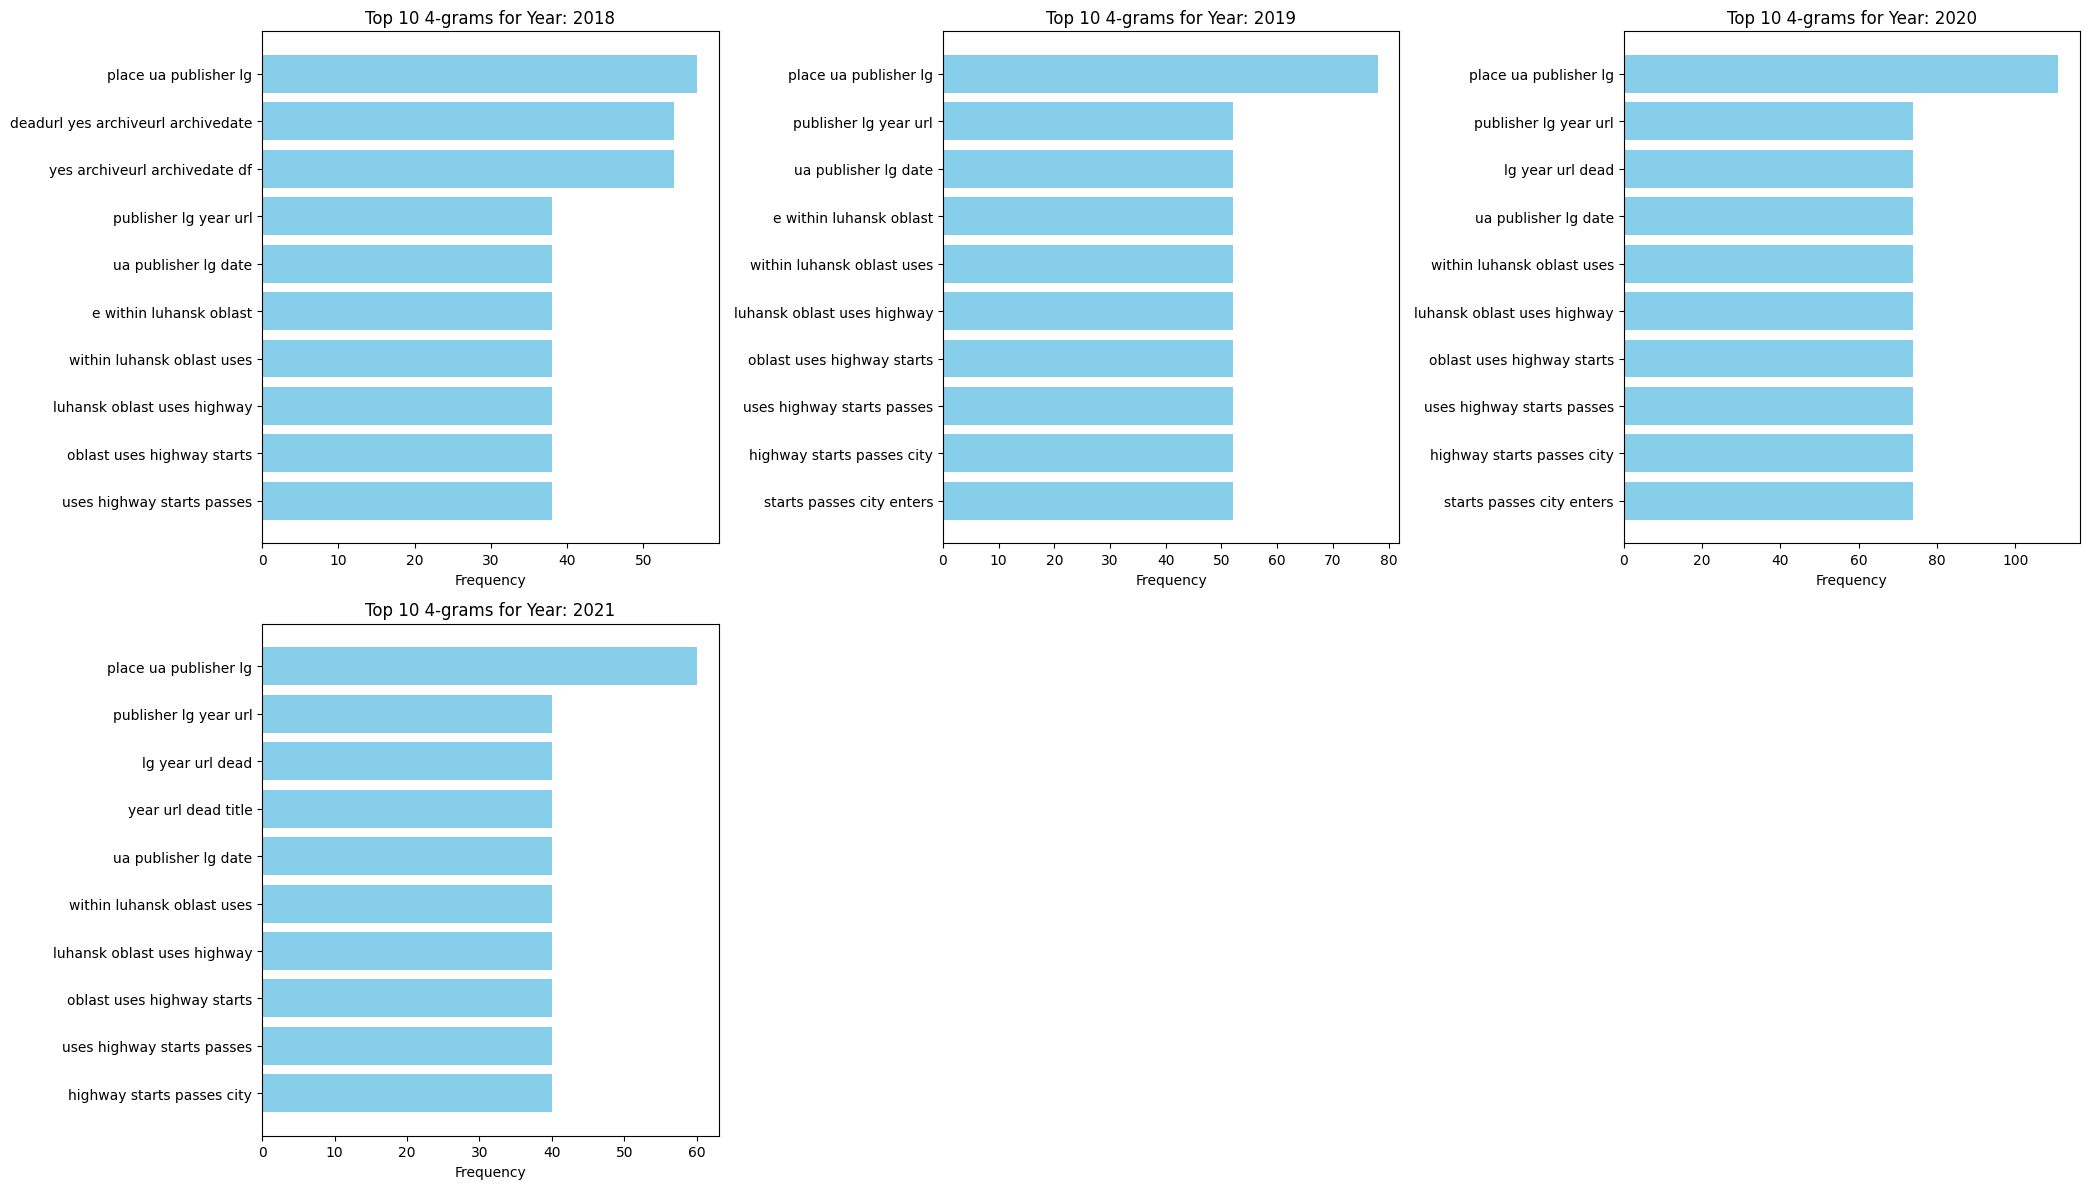

In [27]:
generate_word_clouds(df_en, n=4 , start_date="2018-01", end_date="2022-01-01", interval_type='year', division=2)  # Generates unigram word clouds
plot_top_ngrams(df_en, n=4, start_date="2018-01-01", end_date="2022-01-01", interval_type='year', top_k=10)

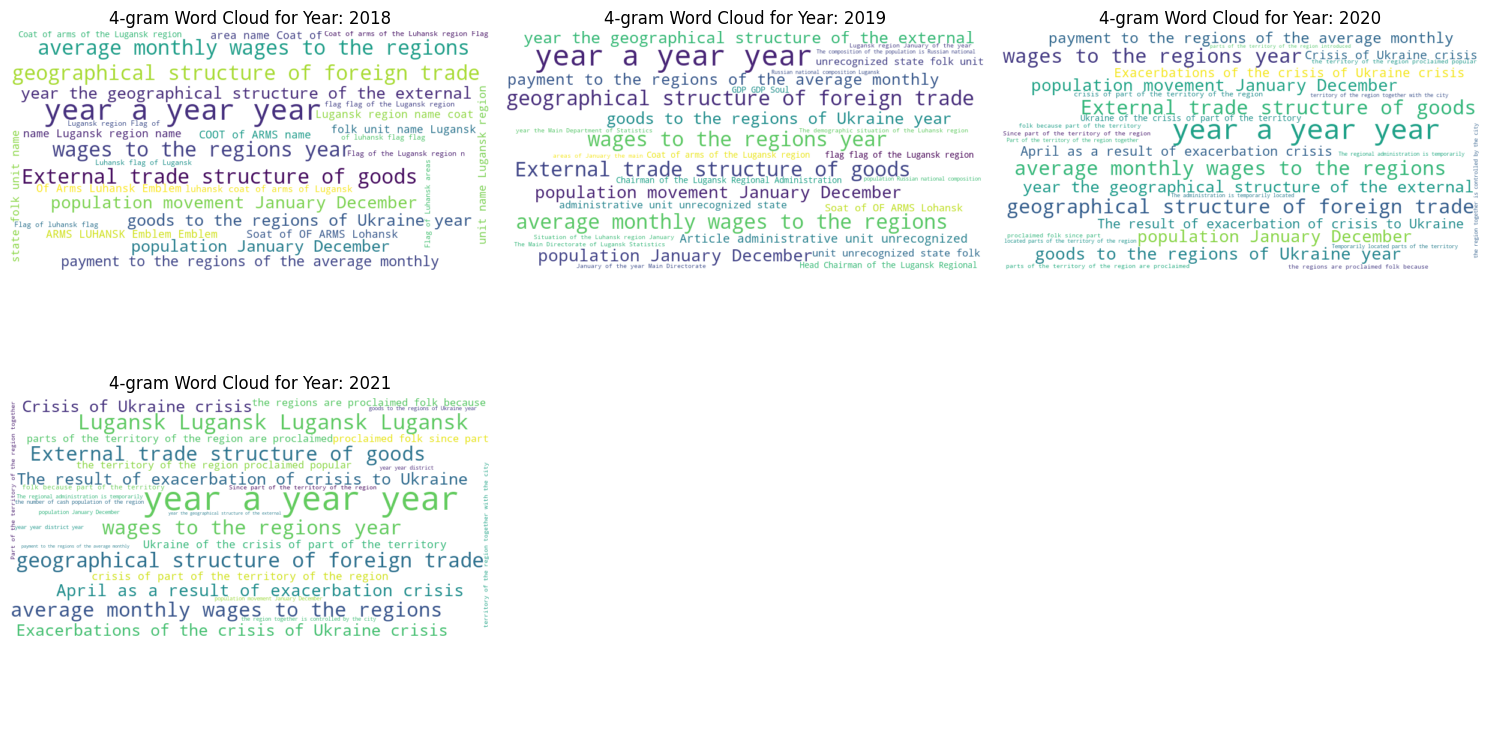

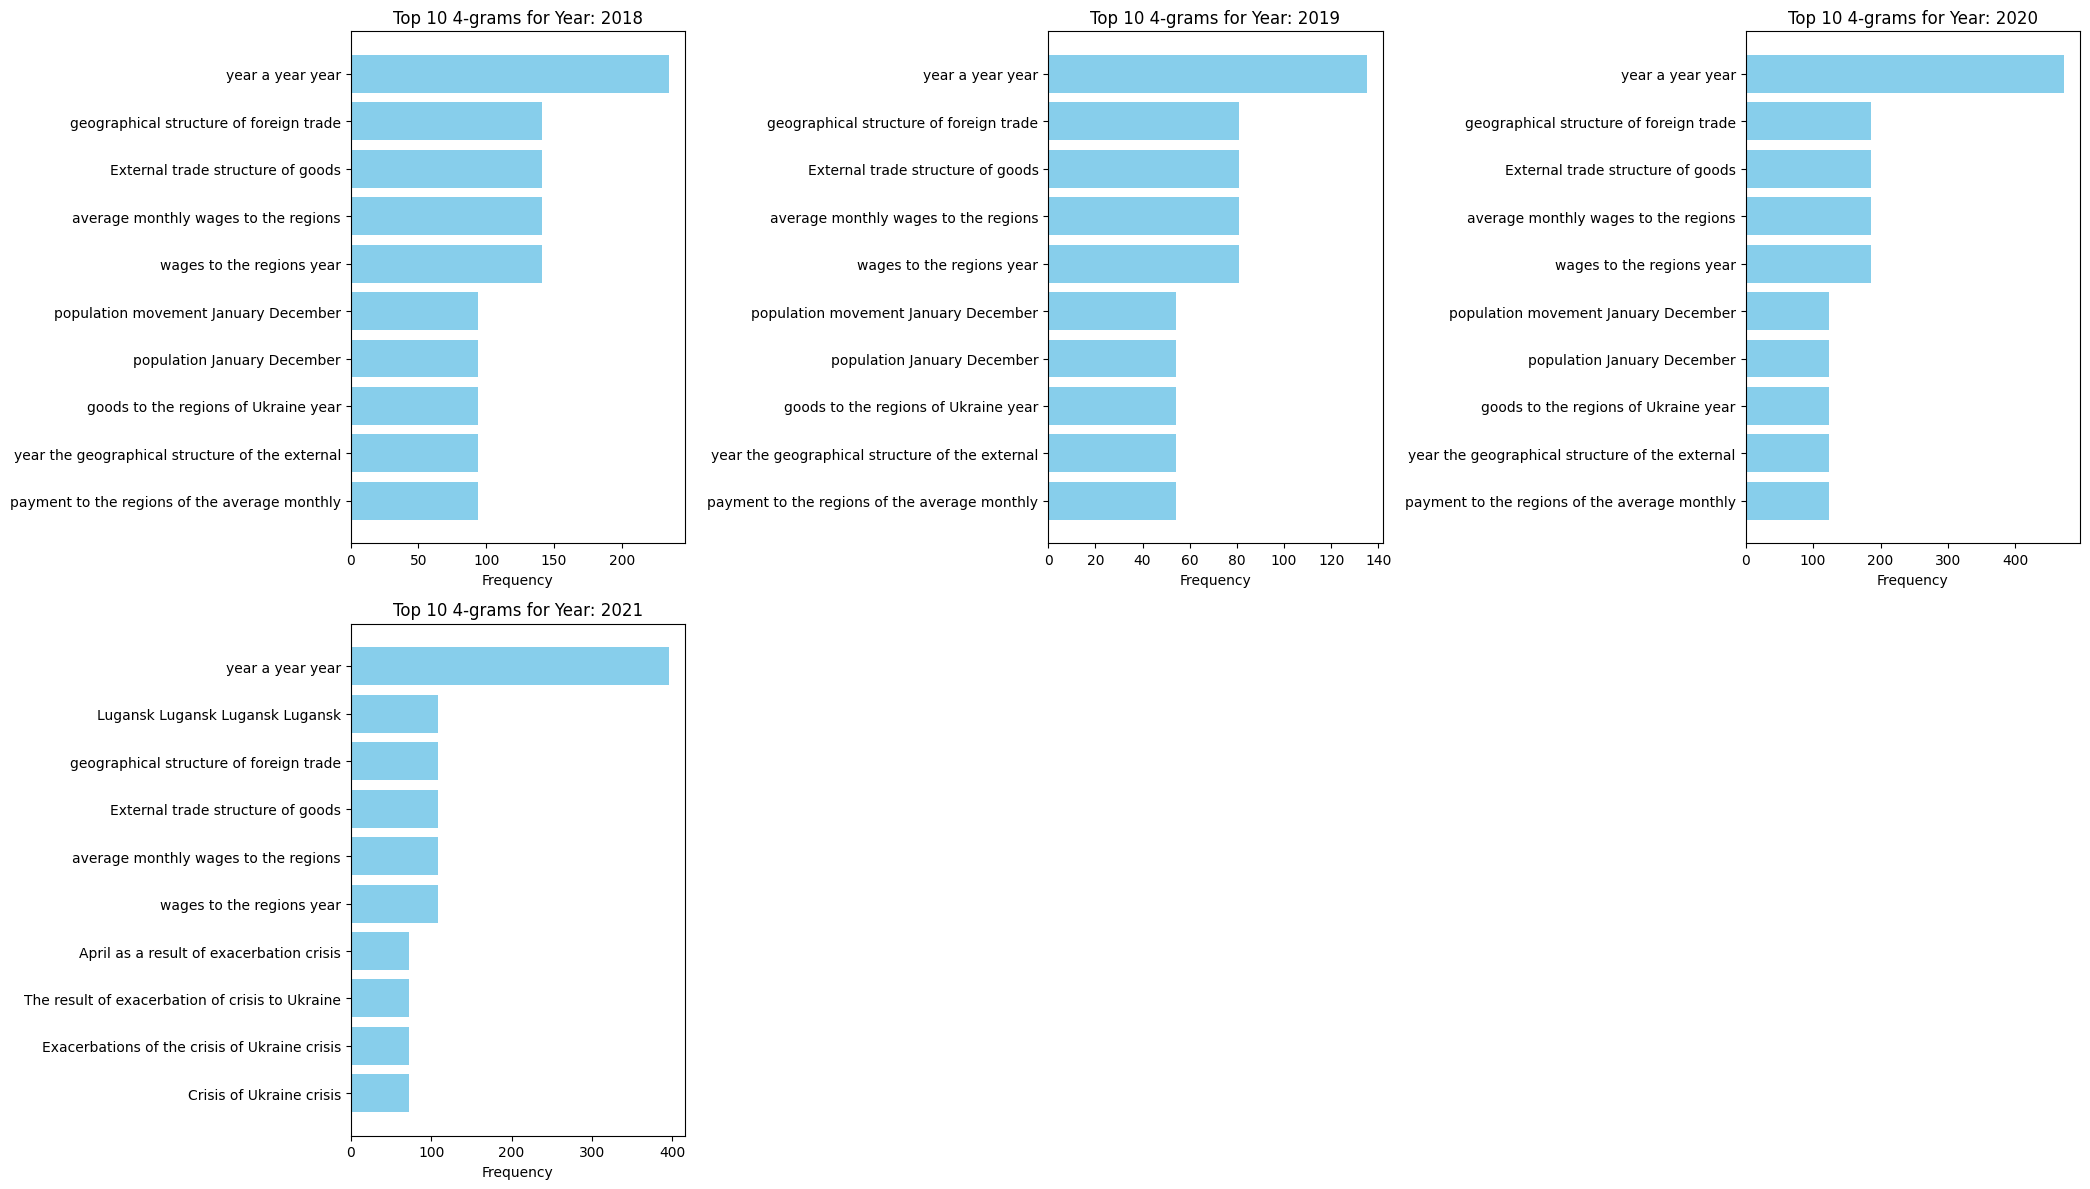

In [28]:
generate_word_clouds(df_ru, n=4 , start_date="2018-01-01", end_date="2022-01-01", interval_type='year', lang='ru')  # Generates unigram word clouds
plot_top_ngrams(df_ru, n=4, start_date="2018-01-01", end_date="2022-01-01", interval_type='year', top_k=10,  lang='ru')

C:\Users\shil6369\AppData\Local\Temp\ipykernel_28348\5518709.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_groups = df.set_index(time_column).resample(freq)
C:\Users\shil6369\AppData\Local\Temp\ipykernel_28348\5518709.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_groups = df.set_index(time_column).resample(freq)


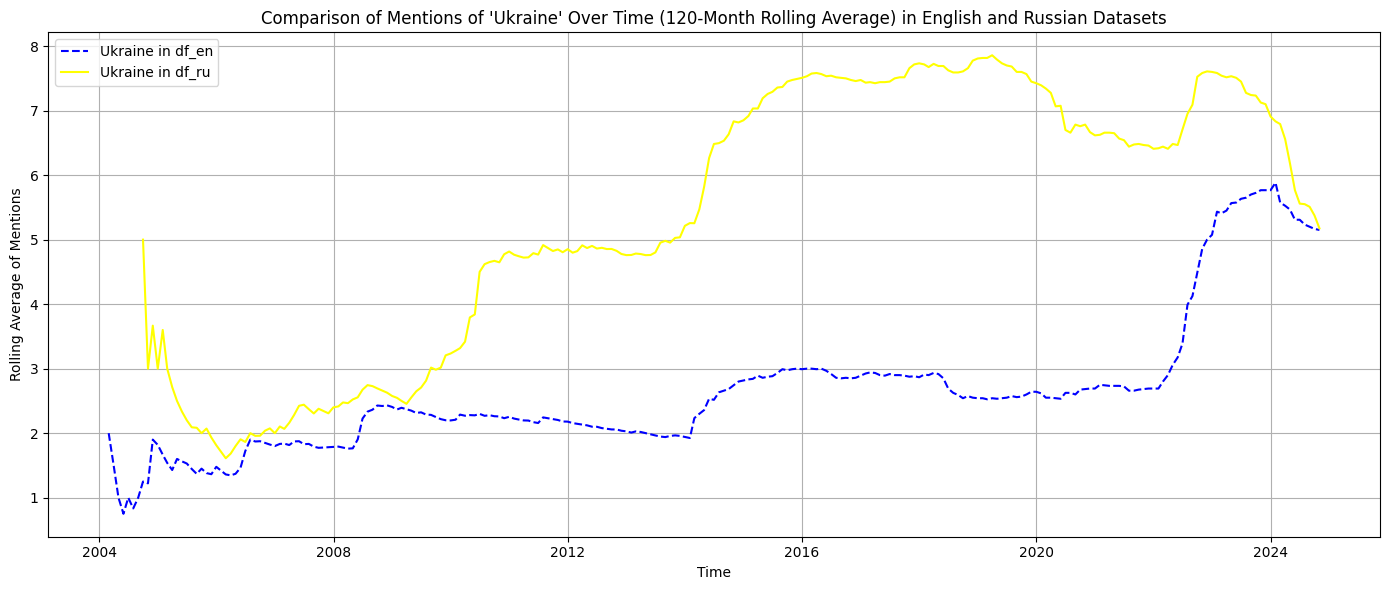

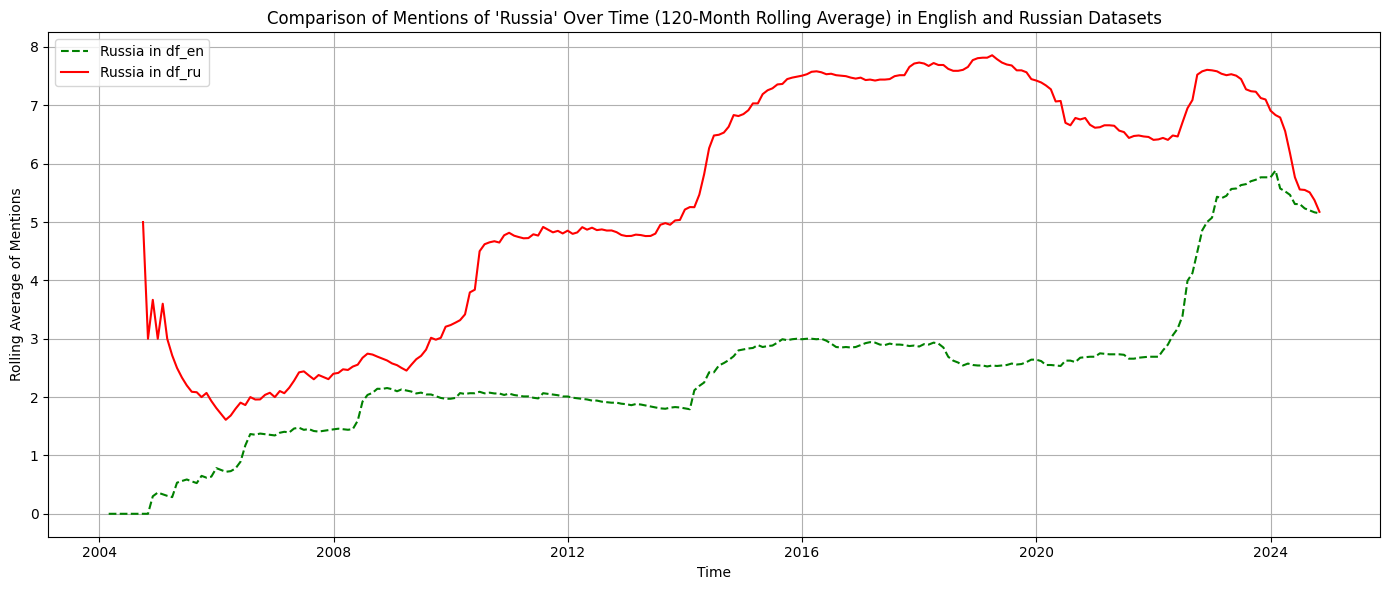

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the words to search in English and Russian datasets
words_en = ["Ukraine", "Russia"]
words_ru = ["Украина", "Россия"]

# Define function to count word mentions over time with fixed rolling window in months
def count_mentions_over_time(df, words, lang='en', time_column='timestamp', freq='M', window_months=12):
    """
    Counts the occurrences of specified words over time in a given DataFrame,
    with optional rolling average over a specific number of months.

    Parameters:
    - df: DataFrame with text data
    - words: List of words to count
    - lang: Language ('en' or 'ru') to handle text accordingly
    - time_column: Name of the time column in df
    - freq: Frequency of time grouping ('Y' for yearly, 'M' for monthly, etc.)
    - window_months: Size of the rolling window in months

    Returns:
    - DataFrame with rolling average counts of each word over specified time intervals
    """
    df[time_column] = pd.to_datetime(df[time_column])  # Ensure time column is in datetime format
    mentions = {word: [] for word in words}  # Store mention counts

    # Group data by time intervals
    time_groups = df.set_index(time_column).resample(freq)

    for word in words:
        # Count occurrences of the word in each time interval
        mentions[word] = time_groups['text'].apply(lambda x: x.str.contains(word, case=False, na=False).sum())
    
    # Convert counts to DataFrame and apply fixed rolling mean in months
    mentions_df = pd.DataFrame(mentions)
    rolling_mentions_df = mentions_df.rolling(window=window_months, min_periods=1).mean()
    
    return rolling_mentions_df

# Define main plotting function with monthly rolling window control
def plot_mentions_comparison(df_en, df_ru, freq='M', window_months=12):
    """
    Plots mentions of 'Ukraine' and 'Russia' over time in English and Russian datasets,
    at a specified granularity with a rolling window in months.

    Parameters:
    - df_en: DataFrame with English text data
    - df_ru: DataFrame with Russian text data
    - freq: Frequency of time grouping ('Y' for yearly, 'M' for monthly, etc.)
    - window_months: Size of the rolling window in months
    """
    # Count occurrences in English dataset
    df_en_counts = count_mentions_over_time(df_en, words_en, lang='en', freq=freq, window_months=window_months)

    # Count occurrences in Russian dataset with Russian equivalents
    df_ru_counts = count_mentions_over_time(df_ru, words_ru, lang='ru', freq=freq, window_months=window_months)

    # Plot for "Ukraine" comparison with rolling window
    plt.figure(figsize=(14, 6))
    plt.plot(df_en_counts.index, df_en_counts["Ukraine"], label="Ukraine in df_en", color='blue', linestyle='--')
    plt.plot(df_ru_counts.index, df_ru_counts["Украина"], label="Ukraine in df_ru", color='yellow')
    plt.xlabel("Time")
    plt.ylabel("Rolling Average of Mentions")
    plt.title(f"Comparison of Mentions of 'Ukraine' Over Time ({window_months}-Month Rolling Average) in English and Russian Datasets")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot for "Russia" comparison with rolling window
    plt.figure(figsize=(14, 6))
    plt.plot(df_en_counts.index, df_en_counts["Russia"], label="Russia in df_en", color='green', linestyle='--')
    plt.plot(df_ru_counts.index, df_ru_counts["Россия"], label="Russia in df_ru", color='red')
    plt.xlabel("Time")
    plt.ylabel("Rolling Average of Mentions")
    plt.title(f"Comparison of Mentions of 'Russia' Over Time ({window_months}-Month Rolling Average) in English and Russian Datasets")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage: plot with monthly data and 12-month rolling average
plot_mentions_comparison(df_en, df_ru, freq='M', window_months=120)  # Adjust window_months for control
